In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import statsmodels.graphics.api as smg
from statsmodels.graphics.tsaplots import plot_pacf
import pandas as pd
import random
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa import stattools as st
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import os
import math
import pandas as pd

In [15]:
def load_data():
    df = pd.read_csv( os.path.join('csv_label', 'learning_data_10.csv') )
    return df[df['day']<=1]

In [16]:
def make_data(x, str,w):
    x=pd.DataFrame(x)
    window=w
    for i in range(1, window):
        column=f'{str}_lag{i}'
        x[column]=x[str].shift(i)
    
#     for i in range(-1, -window, -1):
#         column=f'{str}_lag{i}'
#         x[column]=x[str].shift(i)   
    return x

df= load_data()
lag=[] 
window=6
for str in ['original']:
    lag.append(make_data(df[str], str, window))

# lag.append(df['trend'])
# lag.append(df['seasonal'])
# lag.append(df['resid'])
lag.append(df['day'])
lag.append(df['label'])
df_add_lag=pd.concat(lag, axis=1)
df=df_add_lag.dropna().reset_index(drop=True)
df

original  original_lag1  original_lag2  original_lag3  original_lag4  \
0           54.0           53.6           53.2           52.8           52.8   
1           54.7           54.0           53.6           53.2           52.8   
2           55.7           54.7           54.0           53.6           53.2   
3           55.5           55.7           54.7           54.0           53.6   
4           55.7           55.5           55.7           54.7           54.0   
...          ...            ...            ...            ...            ...   
719460      46.0           46.1           45.9           45.7           45.6   
719461      46.0           46.0           46.1           45.9           45.7   
719462      45.9           46.0           46.0           46.1           45.9   
719463      45.9           45.9           46.0           46.0           46.1   
719464      46.1           45.9           45.9           46.0           46.0   

        original_lag5  day  label  
0                53.4    0      0  
1                52.8    0      0  
2                52.8    0      0  
3                53.2    0      0  
4                53.6    0      0  
...               ...  ...    ...  
719460           46.0    1      0  
719461           45.6    1      0  
719462           45.7    1      0  
719463           45.9    1      0  
719464           46.1    1      0  

[719465 rows x 8 columns]

In [17]:
train=df[(df['label']==0)&(df['day']==0)].sample(frac=1)
train

original  original_lag1  original_lag2  original_lag3  original_lag4  \
261194      45.3           45.7           45.4           45.3           45.3   
143641      45.1           45.1           44.9           45.2           45.4   
26434       58.0           57.3           57.9           57.7           57.8   
43639       54.2           53.8           53.4           53.4           52.5   
142624      45.4           44.9           44.6           45.3           44.9   
...          ...            ...            ...            ...            ...   
84083       66.4           66.7           65.8           65.4           65.3   
155810      45.0           45.4           45.3           45.3           45.0   
60656       53.0           52.7           51.8           52.0           51.1   
218879      45.8           45.4           45.6           45.7           45.6   
53163       48.3           48.3           48.7           49.3           49.0   

        original_lag5  day  label  
261194           45.5    0      0  
143641           45.4    0      0  
26434            57.8    0      0  
43639            52.4    0      0  
142624           45.1    0      0  
...               ...  ...    ...  
84083            64.6    0      0  
155810           45.4    0      0  
60656            51.0    0      0  
218879           45.2    0      0  
53163            50.2    0      0  

[427153 rows x 8 columns]

In [18]:
X_train=train[train.columns[1:-2]].values
X_test=df[(df['day']!=0)][df.columns[1:-2]].values

y_train=train[train.columns[0]].values
y_test=df[(df['day']!=0)][df.columns[0]].values

In [9]:
X_train=df[(df['label']==0)&(df['day']==0)][df.columns[1:-2]].values
# X_train=df[(df['day']==0)][df.columns[1:-2]].values
X_test=df[(df['day']!=0)][df.columns[1:-2]].values

y_train=df[(df['label']==0)&(df['day']==0)][df.columns[0]].values
# y_train=df[(df['day']==0)][df.columns[0]].values
y_test=df[(df['day']!=0)][df.columns[0]].values

In [19]:
from sklearn.ensemble import RandomForestRegressor
r_forest = RandomForestRegressor(
            n_estimators=20,
            criterion='mse',
            random_state=1,
            n_jobs=-1
)

r_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, n_jobs=-1, random_state=1)

In [20]:
tr_start=0
tr_end=tr_start+len(X_train)-1
z_train_pred = np.array(r_forest.predict(X_train))
z_train=pd.DataFrame(z_train_pred, index=range(tr_start, tr_end+1))

vali_start=tr_end+1
vali_end=vali_start+len(X_test)-1
z_test_pred = np.array(r_forest.predict(X_test))
z_test=pd.DataFrame(z_test_pred, index=range(vali_start, vali_end+1))

t_pred=pd.concat([z_train,z_test])

In [21]:
z_test=z_test.values.reshape(-1)
abnorm =(z_test-y_test)
test_plot=y_test
data_unit=17999
num_ax=math.floor(len(test_plot)/data_unit)
label=df.loc[(df['day']!=0),  'label'].values*100
label_index=range(len(label))

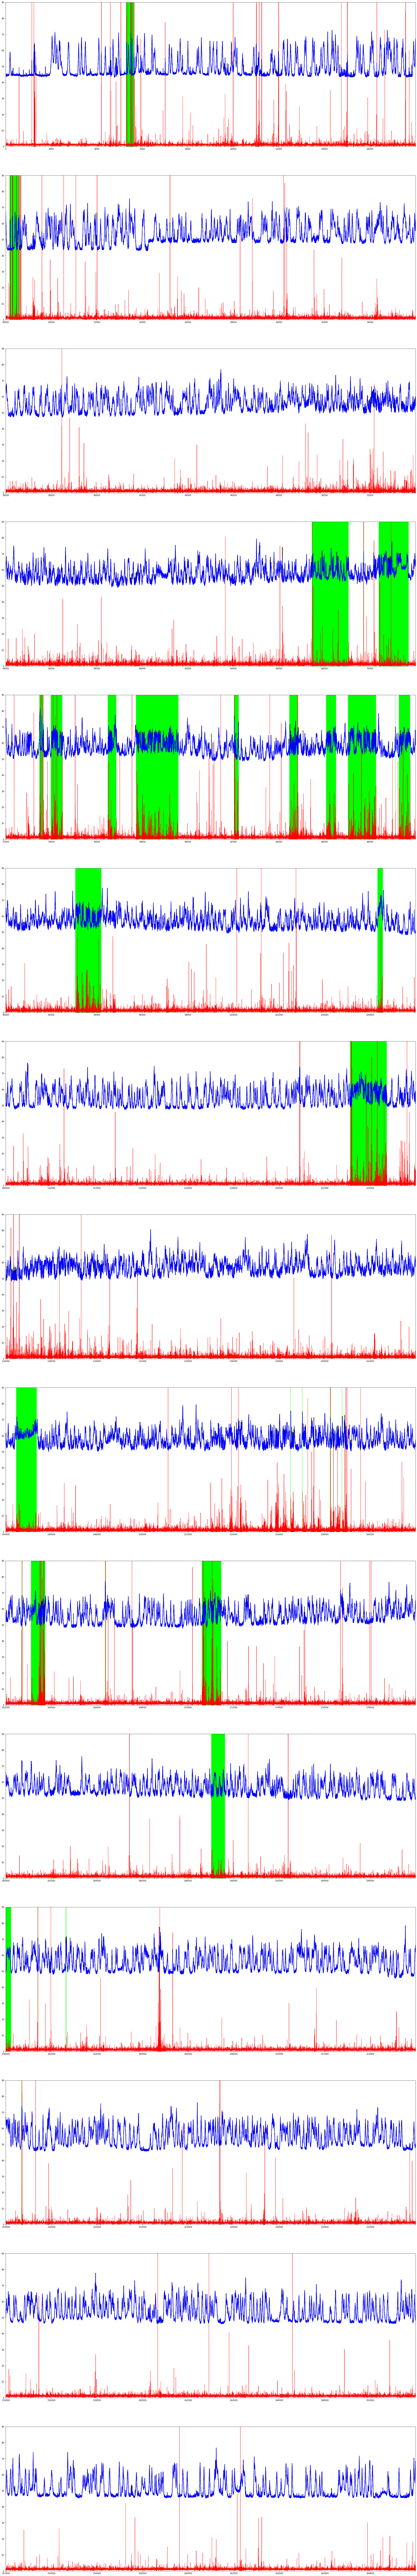

In [13]:
abnorm =np.exp(abnorm)
fig, ax=plt.subplots(num_ax, 1, figsize=(35, 15*num_ax))
for i in range(num_ax):
    ax[i].plot(abnorm, '-r',linewidth = 1 )
    ax[i].plot(test_plot, '-k',linewidth = 2)
    ax[i].plot(z_test, '-b',linewidth = 2)
    ax[i].fill_between(label_index, label, facecolor='lime' )
    ax[i].set_ylim(0, 90)
    ax[i].set_xlim(i*(data_unit), (data_unit)*(i+1))
plt.show()

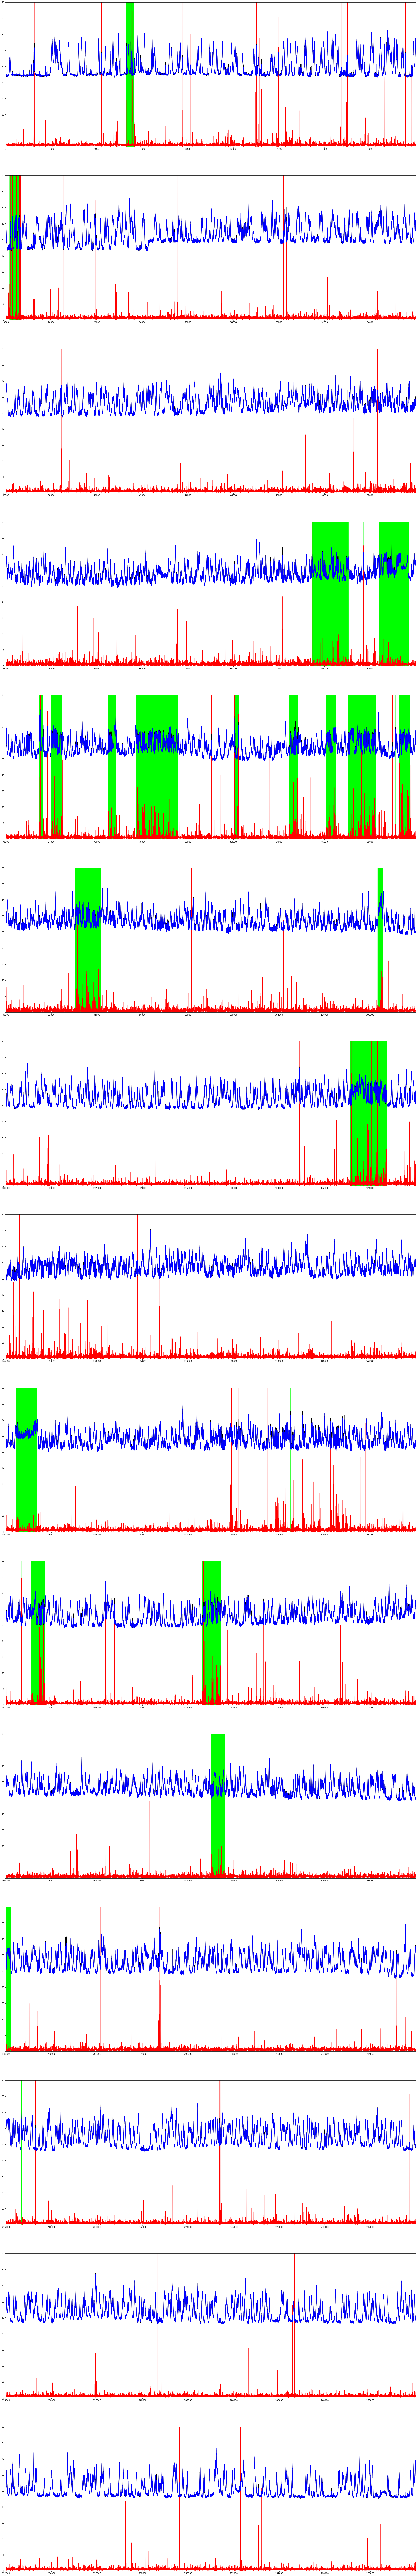

In [22]:
abnorm =np.exp(abnorm)
fig, ax=plt.subplots(num_ax, 1, figsize=(35, 15*num_ax))
for i in range(num_ax):
    ax[i].plot(abnorm, '-r',linewidth = 1 )
    ax[i].plot(test_plot, '-k',linewidth = 2)
    ax[i].plot(z_test, '-b',linewidth = 2)
    ax[i].fill_between(label_index, label, facecolor='lime' )
    ax[i].set_ylim(0, 90)
    ax[i].set_xlim(i*(data_unit), (data_unit)*(i+1))
plt.show()